In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from pathlib import Path
folder='./Helper_scripts/'

importLibs=1
for path in Path(folder).rglob('*.py'):
    print(path.name)
    exec(open(path).read())

parseCC.py
GetFrequencyFromZCfile.py
VariablesExperiment.py
importLibs0.py
FFT.py
DisplayAndCut.py


In [3]:
VariablesExperiment(20210727)

In [4]:
import numpy as np
import pandas as pd
import matplotlib
# matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
#%matplotlib notebook
import os
poles=12
fname1="AZC_3Phasen_"

In [5]:
n=9
fname1+=str(n)+'_'+scope_dat.iloc[n]['Symbol']+'_'

In [6]:
fname1

'AZC_3Phasen_9_parallel_'

# Read ZC file

In [7]:
file=scope_dat.iloc[n]['SerialFile']
df=pd.read_csv(file,sep=";",skiprows=0)
df['time']=df['ESP_CC']*1/uC_clock_speed   #aus CC Zeit berechnen
df['delta_t']=df['time'].diff()

In [8]:
df1=OverflowCC_local(df)

In [9]:
df1.head()

,unixtime,input,ESP_CC,cc_overflow_count,Unnamed: 4,time,delta_t,cc_overflow_python,cc_total,cc_diff,count
0,1.627459e+09,3,494404401,0,NaN,3.090028,NaN,0,494404401,NaN,1
1,1.627459e+09,1,495264464,0,NaN,3.095403,0.005375,0,495264464,NaN,1
2,1.627459e+09,2,496103083,0,NaN,3.100644,0.005241,0,496103083,NaN,1
3,1.627459e+09,3,496947663,0,NaN,3.105923,0.005279,0,496947663,2543262.0,2
4,1.627459e+09,1,497805628,0,NaN,3.111285,0.005362,0,497805628,2541164.0,2


,unixtime,input,ESP_CC,cc_overflow_count,Unnamed: 4,time,delta_t,cc_overflow_python,cc_total,cc_diff,count,time0s
0,1.627459e+09,3,494404401,0,NaN,3.090028,NaN,0,494404401,NaN,1,0.000000
1,1.627459e+09,1,495264464,0,NaN,3.095403,0.005375,0,495264464,NaN,1,0.005375
2,1.627459e+09,2,496103083,0,NaN,3.100644,0.005241,0,496103083,NaN,1,0.010617
3,1.627459e+09,3,496947663,0,NaN,3.105923,0.005279,0,496947663,2543262.0,2,0.015895
4,1.627459e+09,1,497805628,0,NaN,3.111285,0.005362,0,497805628,2541164.0,2,0.021258


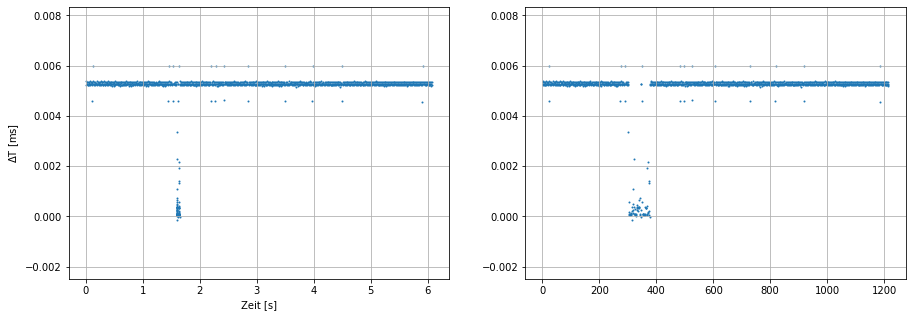

In [10]:
df=df1
df['time0s']=(df['time']-df.head(1)['time'].values)
display(df.head(5))
fig, ax0 = plt.subplots(1,2,figsize = (15,5))
ax=ax0[0]
ax.scatter(df['time0s'],df['delta_t'],s=1)
#t = np.arange(0.0, 20.0+1.0, 1.0)
#ax.xaxis.set_ticks(t)
#plt.xlim(4,17)
ax.grid(True)
#plt.title(r'$B_Z$ [ $\mu T$ ] in Rotornähe während einer Umdrehung')
ax.set_xlabel('Zeit [s]')
ax.set_ylabel(r'$\Delta$T [ms]')
ax=ax0[1]
ax.grid(True)
ax.scatter(df.index,df['delta_t'],s=1)
plt.show()


## select data without measuring errors

In [11]:
a=41;b=240
# Wie Viele Umdrehungen?
c0=df.loc[a,'count']
#df.loc[df['time']<1.25e8]
c1=df.loc[b,'count']
display(c1-c0)
display((c1-c0)/poles)
print('time c1: '+str(df.loc[b,'time0s']))

67

5.583333333333333

time c1: 1.2696550000000006


In [12]:
df=df.loc[a:b].copy()
df.reset_index(inplace = True,drop = True) 

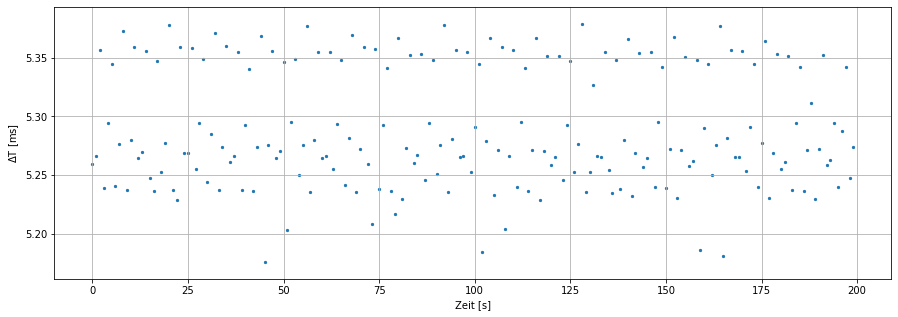

In [13]:
#display(df.head(5))
fig, ax0 = plt.subplots(1,figsize = (15,5))
ax=ax0
ax.scatter(df.index,df['delta_t']*1e3,s=5)
#ax.set_ylim(5e-3,5.6e-3)
ax.grid(True)
ax.set_xlabel('Zeit [s]')
ax.set_ylabel(r'$\Delta$T [ms]')
filename=fname1+'MessergebnisseAuswertung.png'
#plt.savefig(filename, bbox_inches='tight',dpi=900)
plt.show()

## Make Regression

In [14]:
x =df['time']   #erklärend , unabhängig
y =df['delta_t']  # erklärte, abhängig
p = np.polyfit(x, y, 6)  # Last argument is degree of polynomial

print("Coeeficient values:\n", p)
print("y=ax**3+bx**2+cx+d")
predict = np.poly1d(p)
#x_test = 15
#print("\nGiven x_test value is: ", x_test)
#y_pred = predict(x_test)
#print("\nPredicted value of y_pred for given x_test is: ", y_pred)
df['delta_t_pred']=predict(df['time'])

Coeeficient values:
 [-2.42379801e-03  5.57102058e-02 -5.32827428e-01  2.71428786e+00
 -7.76713252e+00  1.18378090e+01 -7.50180256e+00]
y=ax**3+bx**2+cx+d


In [15]:
from sklearn.metrics import r2_score
print(r2_score(y, predict(x))) 

0.002838994805038686


In [16]:
df['delta_t'].mean()

0.0052890781875000025

In [17]:
df['error']=df['delta_t_pred']-df['delta_t']
print("Mean Error " + str(df['error'].mean()))
print("RMSE "+ str((df['error']** 2).mean() ** 0.5))

Mean Error -7.671641100159831e-15
RMSE 5.031950341544364e-05


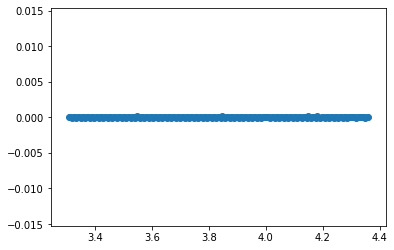

In [18]:
plt.scatter(df['time'],df['error'])

## Assign numbers to each pole

In [19]:
df['pole']=df.index % (3*poles)
df['N']=df.index // (3*poles)

In [20]:
d=3
a=(d*3)*poles;b=(2+d)*3*poles
df4=df[a:b].copy()

In [21]:
#df4[['input','time','error','pole','N']]

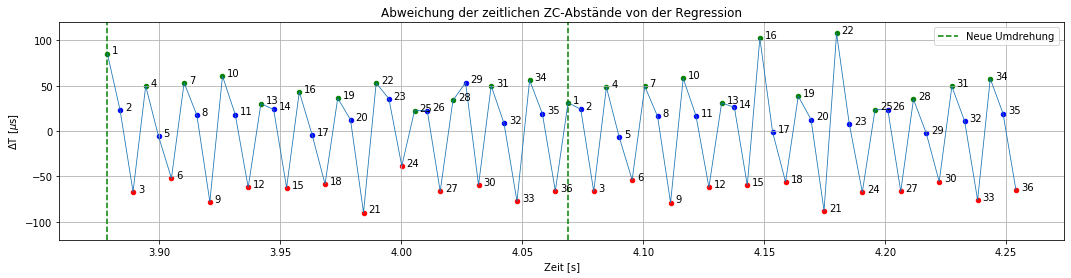

In [22]:
xs=df4['time']
ys=df4['error']*1e6 #für usek
ZC_inp=df4['input']
marker=df4['pole']+1
plt.figure(figsize=(18,4))
plt.plot(xs,ys,lw=0.8)
#plt.scatter(xs,ys,s=15,label='Messpunkt, Nr. ZC')
i=True
vlineHigh=(ys.max()//10+2)*10
s1=20
for x, y,m,ZC_in in zip(xs, ys,marker,ZC_inp):
    plt.text(x+2e-3, y, str(m), color="black", fontsize=10)
    if(ZC_in==1):
        plt.scatter(x,y,s=s1,c='r',label='_Messpunkt ZC Phase L1L2, Nr. ZC')
    if(ZC_in==2):
        plt.scatter(x,y,s=s1,c='g',label='_Messpunkt ZC Phase L1L2, Nr. ZC')
    if(ZC_in==3):
        plt.scatter(x,y,s=s1,c='b',label='_Messpunkt ZC Phase L1L2, Nr. ZC')
    if(m==1):
        plt.vlines(x,-vlineHigh,vlineHigh ,colors='g',linestyle='--',label='Neue Umdrehung' if i == True else "")
        i=False
plt.ylim(-vlineHigh,vlineHigh)
plt.title(r'Abweichung der zeitlichen ZC-Abstände von der Regression')
plt.xlabel('Zeit [s]')
plt.ylabel(r'$\Delta$T [$\mu$s]')
plt.legend()
plt.grid(True)
filename=fname1+'reg'
#plt.savefig(filename+'_MA.png', bbox_inches='tight',dpi=900)
#plt.savefig(filename+'_MA.eps', bbox_inches='tight')
plt.show()

In [23]:
df4_sp=df4.sort_values(by=['pole'])

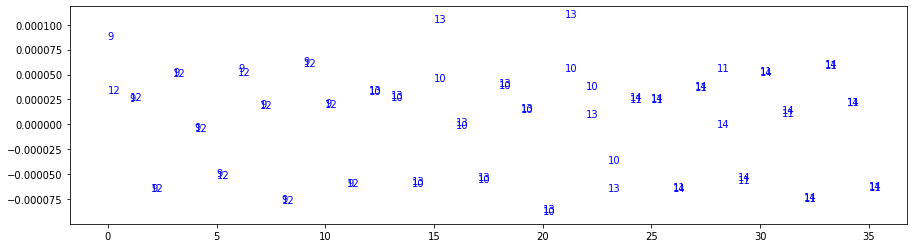

In [24]:
xs=df4_sp['pole']
ys=df4_sp['error']
marker=df4_sp.index//poles
plt.figure(figsize=(15,4))
for x, y,m in zip(xs, ys,marker):
    #print(x,y,m)
    plt.text(x, y, str(m), color="blue", fontsize=10)
    plt.scatter(x, y,s=0.0001)
plt.show()

# Display as Heatmap

In [25]:
df_copy=df[['pole','N','delta_t','error']].copy()
df_copy.drop(df.tail(df_copy.shape[0]%poles).index,inplace=True)
times=df_copy['error'].to_numpy()*1e6
times=np.array_split(times, df_copy.shape[0]/(poles))

<Figure size 432x288 with 0 Axes>

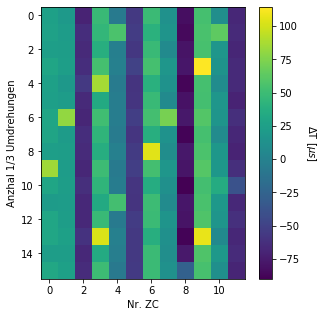

In [26]:
plt.figure()
fig, ax = plt.subplots(figsize=(5, 5))
im = ax.imshow(times)
cbar=fig.colorbar(im)
ax.set_xlabel("Nr. ZC")
ax.set_ylabel("Anzhal 1/3 Umdrehungen")
cbar.ax.set_ylabel(r'$\Delta$T [$\mu s$]', rotation=-90, va="bottom")
#plt.title(r'Abweichung der zeitlichen ZC-Abstände von der Regression')
filename=fname1+'reg_heat.png'
#plt.savefig(filename+'.png', bbox_inches='tight',dpi=900)
#plt.savefig(filename+'.eps', bbox_inches='tight')
plt.show()

(array([17., 46.,  1.,  3., 25., 52., 28., 21.,  3.,  4.]),
 array([-8.98937145e-05, -6.94677199e-05, -4.90417253e-05, -2.86157307e-05,
        -8.18973604e-06,  1.22362586e-05,  3.26622532e-05,  5.30882478e-05,
         7.35142424e-05,  9.39402371e-05,  1.14366232e-04]),
 <a list of 10 Patch objects>)

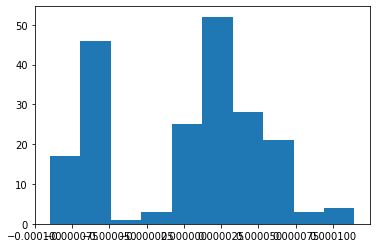

In [27]:
plt.hist(df['error'])

In [28]:
df.loc[df['error']>2e-4]=0
df.loc[df['error']<-2e-4]=0

In [29]:
ys.max()

0.0001078345435407968